# Supermarket Sales Report
This dataset contains sales transactions from a supermarket over the course of one month. It includes purchase dates, customer membership status, product categories, and sales amounts. 

The goal of this analysis is to evaluate sales performance, identify customer behavior patterns, and uncover insights that could support management decisions.

This notebook will:
- Clean and prepare the dataset
- Explore Sales Trends
- Analyse customer segments (gender, membership status)
- Examine product performance
- Present insights and recommendations in a business-oriented context.

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns                                     # Raw data I will be using for this report

df=pd.read_csv("supermarket_sales.csv")

print(df.head())       
print(df.info())        
print(df.describe())   


  Invoice ID        Date Customer Type  Gender Product Category  Unit Price  \
0    INV0001  2024-03-10        Member     NaN           Snacks       24.72   
1    INV0002  2024-03-04       Visitor  Female       Vegetables       44.27   
2    INV0003  2024-03-11       Visitor  Female           Fruits       27.93   
3    INV0004  2024-03-07       Visitor  Female           Fruits       39.68   
4    INV0005  2024-03-17       Visitor    Male       Vegetables       38.59   

   Quantity  Total Sales  Payment Method  
0         3       323.78            Cash  
1         7       354.98     Credit Card  
2         8        45.14     Credit Card  
3         1        52.96  Mobile Payment  
4        10        95.29            Cash  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Invoice ID        150 non-null    object 
 1   Date             

## Data Preparation

Before analysis, the dataset needed to be prepared and standardised.

- **Handle missing values**: Replace numeric NaNs with median values and categorical NaNs with "Null".
- **Convert data types**: Ensure the `Date` column is in datetime format.
- **Feature engineering**: Add useful columns such as:
    - Day of the week
    - Weekend vs weekday indicator
- **Consistency checks**: Verify no duplicate rows and all sales values are valid (e.g., non-negative).

The dataset will then be ready for experimentation.



In [2]:
df["Date"] = pd.to_datetime(df["Date"]) # Date to date_time

def replace_negative(x):
    if x < 0:
        return 0
    else:
        return x


for col in df.columns:
    if df[col].dtype in ["int64", "float64"]: #         Replaceing empty values with 
        df[col] = df[col].fillna(df[col].median()) #    either median or Null 
    else:
        df[col] = df[col].fillna("Null")
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]: #         Replacing negative values with 0
        df[col] = df[col].apply(replace_negative)



## Exploration and Visualisation

In the next steps, I will focus on exploring patterns and trends in the supermarket sales data through various visualisations. This will help uncover insights about customer behavior, sales trends, and operational patterns.

### Identifying peak times through the course of a week.

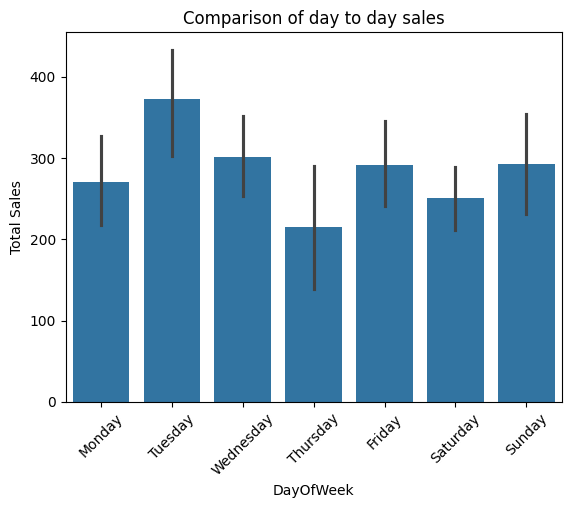

In [3]:
def date_of_purchase_trend():

    df["DayOfWeek"] = df["Date"].dt.day_name()
    
    df["is_weekend"] = df["Date"].dt.dayofweek >=5
    # Creating chart to present day-to-day sales comparison
    sns.barplot(x="DayOfWeek", y="Total Sales", data = df, order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.title("Comparison of day to day sales")
    plt.xticks(rotation=45)
    plt.show()

date_of_purchase_trend()

The bar plot shows that Tuesdays have the highest total sales throughout the month. However, Sundays have shorter opening hours, which suggests that sales during their limited hours may be relatively concentrated, indicating higher activity per hour on Sundays.

### Item Performance

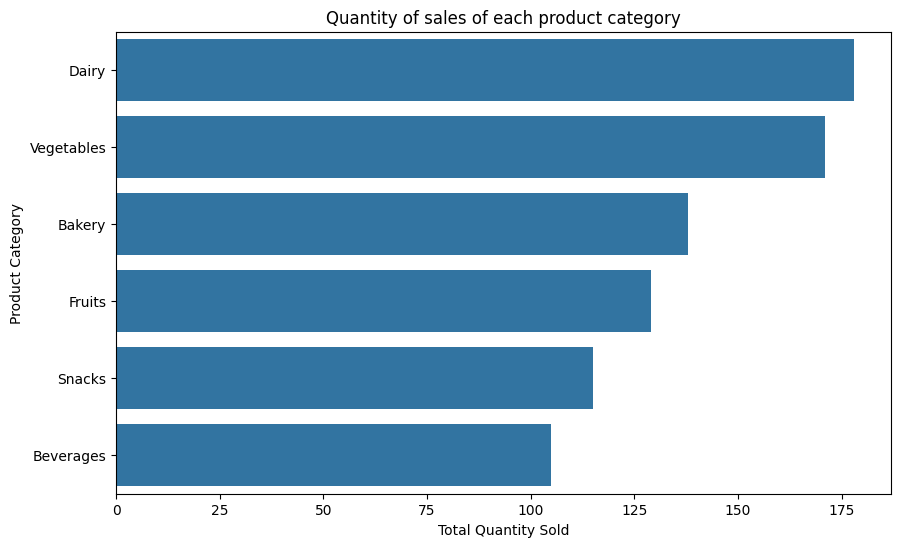

In [4]:
def item_performance():


    total_sales = df.groupby("Product Category")["Quantity"].sum().reset_index()
    total_sales = total_sales.sort_values(by="Quantity", ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x="Quantity", y="Product Category", data=total_sales)
    plt.title("Quantity of sales of each product category")
    plt.xlabel("Total Quantity Sold")
    plt.ylabel("Product Category")
    plt.show()

item_performance()

This bar plot shows which categories sell the most. This insight can guide decisions on which items to put on sale, as well as highlight categories that may benefit from improved marketing or product design, leading to improved sales and consumer satisfaction.

## Member vs Visitor

There are many ways to explore trends between Members vs non-members. Loyalty programs can be adjusted to improve member counts keeping customers returning to stores.

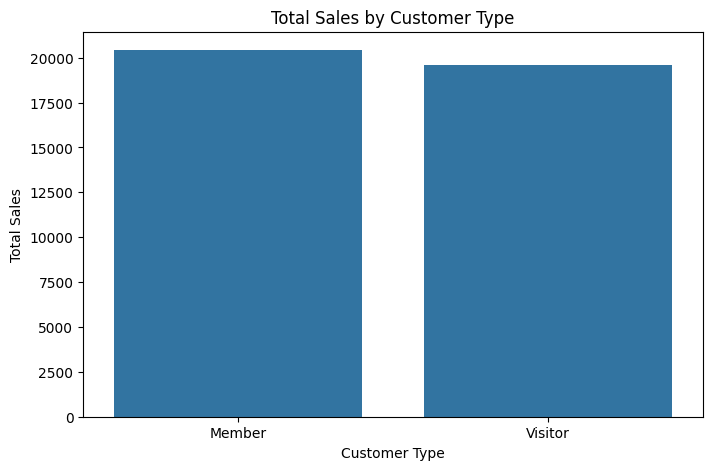

The percentage increase of Member sales over Visitor sales are 2.08 %
The difference in sales between Members and visitor is £ 833.44


In [18]:
def customer_type():

    df_member_status = df[df["Customer Type"].isin(["Member", "Visitor"])] # Split customers into member and visitor

    
    customer_type_sales = (
    df_member_status.groupby("Customer Type")["Total Sales"] # Sum total sales for all memebrs and visitors
    .sum()
    .reset_index()
    )
    
    plt.figure(figsize=(8,5))
    sns.barplot(x="Customer Type", y="Total Sales", data=customer_type_sales)
    plt.title("Total Sales by Customer Type")
    plt.xlabel("Customer Type")
    plt.ylabel("Total Sales")
    plt.show()
    total = customer_type_sales.loc[customer_type_sales["Customer Type"]=="Member", "Total Sales"].values[0] \
           + customer_type_sales.loc[customer_type_sales["Customer Type"]=="Visitor", "Total Sales"].values[0]
    difference = customer_type_sales.loc[customer_type_sales["Customer Type"]=="Member", "Total Sales"].values[0] \
           - customer_type_sales.loc[customer_type_sales["Customer Type"]=="Visitor", "Total Sales"].values[0]

    print ("The difference in sales between Members and visitor is £",round(difference, 2))
    print("The percentage increase of Member sales over Visitor sales are", round(difference/total*100, 2),"%")

    
customer_type()

During the month of March, Member's total sales outnumbered visitor's sales by £833.44 which is only 2% of total sales that Members spend over non-members. This can be further broken down into seeing how many members and visitors there are.

In [20]:
def number_of_customers():
    customer_counts = df.groupby("Customer Type")["Customer Type"].count().reset_index(name="Count")
    #print(total_customers)
    member_count = customer_counts.loc[customer_counts["Customer Type"]=="Member", "Count"].values[0]
    visitor_count = customer_counts.loc[customer_counts["Customer Type"]=="Visitor", "Count"].values[0]

    print("Members:", member_count)
    print("Visitors:", visitor_count)

number_of_customers()

Members: 72
Visitors: 70


## Analysis of customer type performance:
The total sales generated by members were approximately 2% higher than those generated by visitors. Interestingly, the number of members (72) and visitors (70) was nearly the same.

This suggests that members tend to spend slightly more per transaction compared to visitors, even though both groups are equally represented in terms of customer count. The difference, while small, could indicate that membership status has a modest positive effect on spending behavior. A focus on achieving higher membership counts would likely improve sales revenue.

## Conclusion

* Peak sales occur midweek, with Tuesdays boasting the highest sales volume. However, due to Sunday's fewer operational hours, a higher concentration of shopping occurs on Sunday.
* Each product category sells well with Dairy being bought the most. Snacks and Beverages could benefit from advertisements or promotions to boost sales figures.
* Despite similar customer counts, Members spend slightly more on average than visitors potentially showing that loyalty incentives are effective.

Potential Business Actions

* Encourage visitors to sign up for membership to boost sales
* Build store-specific inventory system to stock items based on trends in sales figures.
* Extend/decrease operating hours dependent on peak sales figures to maximise customer spend throughout the week.